In [43]:
from typing import Dict, Tuple, List, Any

import numpy as np
from matplotlib import pyplot as plt

Task 1. Simulate a path of the Wiener process. Number of end-points of the grid including $T$ is $N=100$, length of the interval $[0, T]$ in time units is 1, time increment is $\Delta = T/N$. Plot the path.

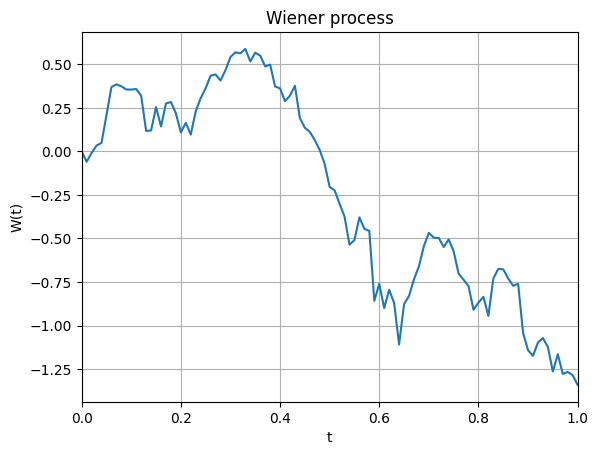

In [2]:
def WienerRandomValue(t):
    return np.sqrt(t) * np.random.normal(0, 1)


def WienerProcess(N, T):
    t_data = np.linspace(0, T, N + 1)
    w_data = np.zeros(N + 1)
    dt = T/N
    for i in range(1, N + 1):
        w_data[i] = w_data[i - 1] + WienerRandomValue(dt)
    return t_data, w_data

N = 100
T = 1
t_data, w_data = WienerProcess(N, T)

plt.plot(t_data, w_data)
plt.xlabel("t")
plt.ylabel("W(t)")
plt.xlim(0.0, 1.0)
plt.title("Wiener process")
plt.grid(True)
plt.show()

Task 2. Using the random walk algorithm simulate three paths of the Wiener process as the limit of a random walk for different $n=10, 100, 1000$. Plot the paths in one figure, add the legend.

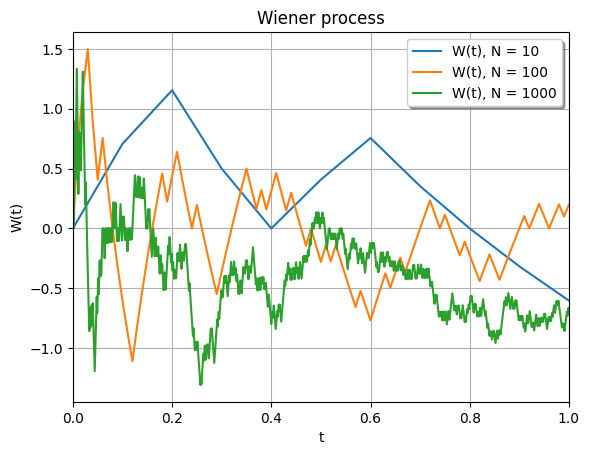

In [3]:
def RandomValueP(p):
    assert p > 0.0 and p < 1.0, '0 < p < 1'

    rand = np.random.uniform(0, 1)
    if rand <= p:
        return 1
    else:
        return -1

def RandomWalk(p, N):
    t_data = np.linspace(0, 1, N + 1)
    w_data = np.zeros(N + 1)
    for i in range(1, N + 1):
        w_data[i] = w_data[i - 1] * np.sqrt(i / (i + 1)) + RandomValueP(p) / np.sqrt(i + 1)
    return t_data, w_data

p = 0.5
N = [10, 100, 1000]
for k in N:
    t_data, w_data = RandomWalk(p, k)
    plt.plot(t_data, w_data, label = f"W(t), N = {k}")

plt.legend(loc = 'best', fancybox = True, shadow = True)
plt.xlim(0.0, 1.0)
plt.xlabel("t")
plt.ylabel("W(t)")
plt.title("Wiener process")
plt.grid(True)
plt.show()

Task 3. Using the the Karhunen-Loeve expansion simulate three paths of the Wiener process with
$n = 10, 50, 100$ terms. Plot the paths in one figure, add legends.

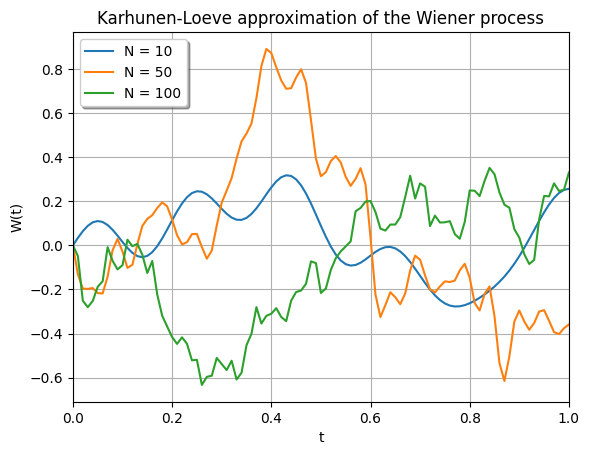

In [4]:
def phi(k, t, T):
    return 2 * np.sqrt(2 * T) / np.pi / (2 * k + 1) * np.sin((2 * k + 1) * np.pi * t / (2 * T))

def KarhunenLoeveApprox(T, Nt, Nz):
    z_data = np.random.normal(0, 1, size = Nz)
    t_data = np.linspace(0, T, Nt + 1)
    k = np.arange(0, len(z_data)) + 1
    w_data = np.zeros(Nt + 1)
    for i in range(0, Nt + 1):
        phi_data = phi(k, t_data[i], T)
        w_data[i] = np.dot(z_data, phi_data)
    return t_data, w_data

T = 1
Nt = 100
Nz = [10, 50, 100]

for k in Nz:
    t_data, w_data = KarhunenLoeveApprox(T, Nt, k)
    plt.plot(t_data, w_data, label = f'N = {k}')

plt.legend(loc = 'upper left', fancybox = True, shadow = True)
plt.xlim(0.0, 1.0)
plt.xlabel("t")
plt.ylabel("W(t)")
plt.title("Karhunen-Loeve approximation of the Wiener process")
plt.grid(True)
plt.show()

Task 4. Plot a trajectory of the geometric Brownian motion obtained from the simulation of the path of the Wiener process, $r=1$ (interest rate) and $\sigma = 0.5$ (volatility).

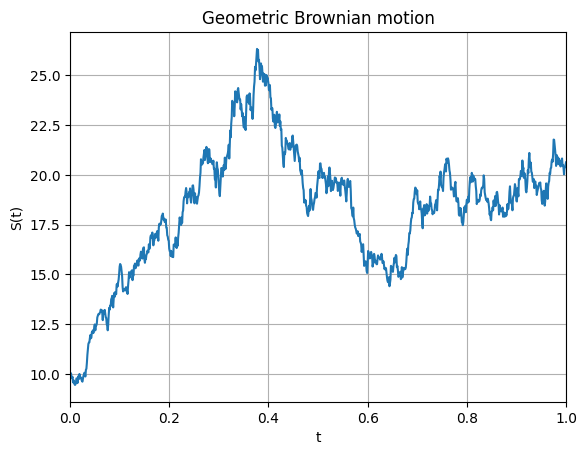

In [5]:
def GeometricBrownianMotion(S0, r, sigma, T):
    Nt = 1000
    t_data = np.linspace(0, T, Nt + 1)
    s_data = np.zeros(Nt + 1)
    s_data[0] = S0
    dt = T / Nt
    for i in range(1, Nt + 1):
        s_data[i] = s_data[i-1] * np.exp((r - sigma**2 / 2)* dt + sigma * WienerRandomValue(dt))
    return t_data, s_data

S0 = 10
r = 1
sigma = 0.5
T = 1

t_data, s_data = GeometricBrownianMotion(S0, r, sigma, T)
plt.plot(t_data, s_data)
plt.xlim(0.0, 1.0)
plt.xlabel("t")
plt.ylabel("S(t)")
plt.title("Geometric Brownian motion")
plt.grid(True)
plt.show()

Task 5. Plot a trajectory of the the Brownian bridge starting at $x$ at time 0 and terminating its run at $y =-1$ at time $T$ obtained from the simulation of the path of the Wiener process. Add markers for start and end points.

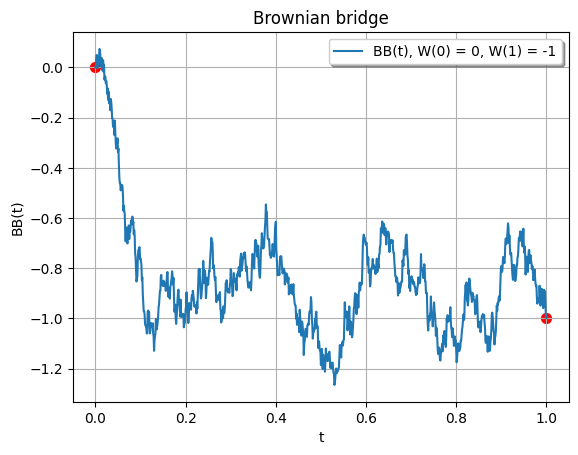

In [6]:
def BrownianBridge(x, y, t0, T):
    Nt = 1000
    t_data, w_data = WienerProcess(Nt, T)
    dt = T/Nt
    bb_data = np.zeros(Nt + 1)
    for i in range(0, Nt + 1):
        bb_data[i] = x + w_data[i] - (t_data[i] - t0) / (T - t0) * (w_data[Nt - 1] - y + x)
    return t_data, bb_data

x = 0
y = -1
t0 = 0
T = 1
t_data, bb_data = BrownianBridge(x, y, t0, T)

plt.plot(t_data, bb_data, label = f"BB(t), W({t0}) = {x}, W({T}) = {y}")
plt.scatter ( t0, x, color = "red", s = 50)
plt.scatter ( T, y, color = "red", s = 50)
plt.legend(loc = 'best', fancybox = True, shadow = True)
plt.xlabel("t")
plt.ylabel("BB(t)")
plt.title("Brownian bridge")
plt.grid(True)
plt.show()

Task 6.  Let us consider a random walk $X = (X_n)_{n \geq 0}$:
$$
X_n = \sum_{k=1}^n \xi_k, \quad \xi_k =
\begin{cases}
1, &\text{with probability $\frac12$}; \\
-1, &\text{with probability $\frac12$}.
\end{cases}
$$
$$
\mathbb{E}\xi_k = 0, \quad \mathrm{Var}\, \xi_k = 1.
$$

Plot $(X_{t_i})_{t_i = \frac{i}{n}}$ so that $t_i$ takes values in $[0,\, 1]$.

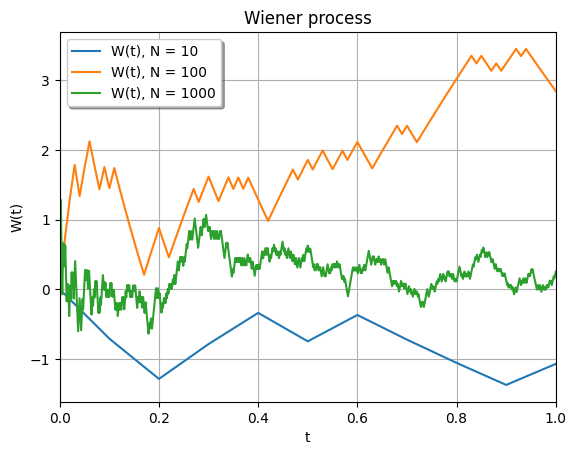

In [37]:
def RandomWalk(p: float, N: int) -> Tuple[np.ndarray, np.ndarray]:
    """
        the function generates a random walk with a given probabilty within N pathes

        Arguments:
            p, float - a probabilty to take a state of 1
            N, int - number of trajectories to generate

        Returns:
            t_data, np.ndarray - an array of time points
            w_data, np.ndarray - an array of random wolk states
    """
    try:
        assert isinstance(p, float) and (p >= .0 and p <= 1.)
    except AssertionError:
        print(f'the value of p must be float value between 0.0 and 1.0, but {p} was given')

    # generate N p values for N steps and fill xi
    xi_s = np.where(np.random.uniform(low=0.0, high=1.0, size=(N+1)) <= p, -1, 1)
    
    # generate time_steps and an array to store winer process pathes
    t_data = np.linspace(0, 1, N+1)
    w_data = np.zeros(N+1)

    # fill pathes
    for i in range(1, N + 1):
        w_data[i] = w_data[i - 1] * np.sqrt(i / (i + 1)) + xi_s[i] / np.sqrt(i + 1)

    # w_data[1:] = (w_data[:-1] * np.sqrt(np.arange(1, N+1) / np.arange(1, N+1) + 1) + xi_s / np.sqrt(np.arange(1, N+1) + 1)).cumsum()


    return t_data, w_data

p = 0.5
N = [10, 100, 1000]
for k in N:
    t_data, w_data = RandomWalk(p, k)
    plt.plot(t_data, w_data, label = f"W(t), N = {k}")

plt.legend(loc = 'best', fancybox = True, shadow = True)
plt.xlim(0.0, 1.0)
plt.xlabel("t")
plt.ylabel("W(t)")
plt.title("Wiener process")
plt.grid(True)
plt.show()

Task 7. Let $H = (H_n)_{n \geq 1}$ be the player's bet at the $n$-th step, i.e. his winnings at this step are equal to $H_n (X_n - X_{n-1}) = H_n \Delta X_n$.

Plot an accumulated winnings of player $Y_n$ at step $n \geq 1$.


Solution:

To solve the problem let's consider $X_n$ be a random process, particulary a Random Walk, where $$X_{n+1}=X_n + \triangle X_n$$ 

The bet H is constant as stated (but might be a function of n)


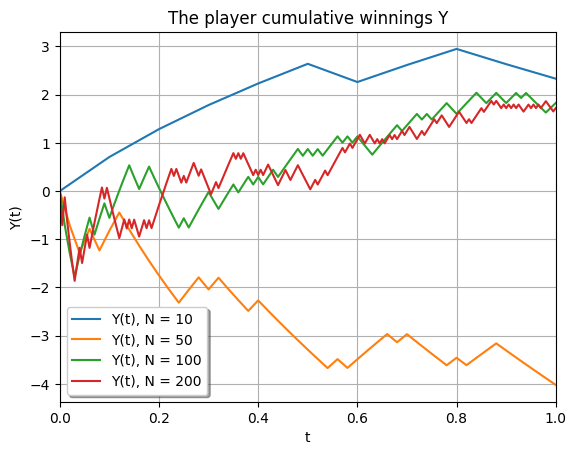

In [41]:
p=.5
H = 1


n = [10, 50, 100, 200]

for N in n:
    # generate a random walk from the previous task
    t_data, w_data = RandomWalk(p, N)

    # calculate states differences
    delta_w = np.diff(w_data, prepend=0)

    winnings = H * delta_w

    Y = winnings.cumsum()

    plt.plot(t_data, Y, label = f"Y(t), N = {N}")

plt.legend(loc = 'best', fancybox = True, shadow = True)
plt.xlim(0.0, 1.0)
plt.xlabel("t")
plt.ylabel("Y(t)")
plt.title("The player cumulative winnings Y")
plt.grid(True)
plt.show()

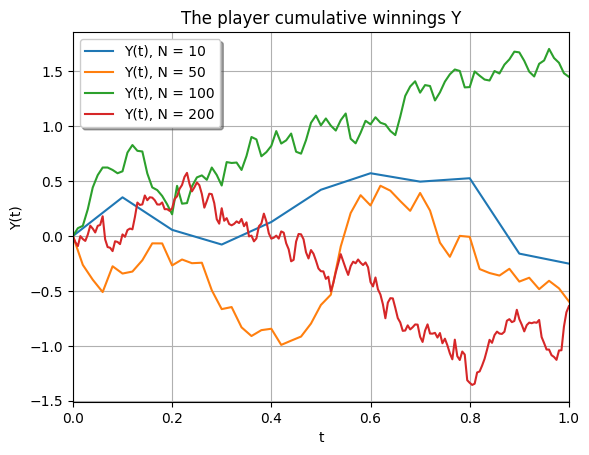

In [42]:
# simulating bets via Wiener process
def WienerProcessGen(n_steps: int, start_time=0, end_time=1) -> Tuple[np.ndarray, np.ndarray]:
    """
        the function generates a random Wiener process with n_steps points
        within time frame [start_time, end_time]

        Arguments:
            n_steps, int - the number of wiener process steps
            start_time, float - the start time point, by default equals 0
            end_time, float - the end time point, by default equals 1

        Returns:
            t_data, np.ndarray - an array of time points
            w_data, np.ndarray - an array of wiener process states
    """

    try:
        assert isinstance(n_steps, int) and n_steps > 0
        assert isinstance(start_time, float) or isinstance(start_time, int)
        assert isinstance(end_time, float) or isinstance(end_time, int)
        assert isinstance(start_time < end_time)
    except AssertionError:
        print('check you input values')
        
    # calculate time increase
    dt = (end_time - start_time) / (n_steps)

    # generate random normal points
    z = np.random.normal(0, 1, size=(N))

    w_data = np.zeros(N + 1)

    for i in range(1, N + 1):
        w_data[i] = w_data[i - 1] + z[i-1] * np.sqrt(dt)

    return np.linspace(start_time, end_time, n_steps + 1), w_data


H = 1

n = [10, 50, 100, 200]

for N in n:
    # generate a random walk from the previous task
    t_data, w_data = WienerProcessGen(N)

    # calculate states differences
    delta_w = np.diff(w_data, prepend=0)

    winnings = H * delta_w

    Y = winnings.cumsum()

    plt.plot(t_data, Y, label = f"Y(t), N = {N}")

plt.legend(loc = 'best', fancybox = True, shadow = True)
plt.xlim(0.0, 1.0)
plt.xlabel("t")
plt.ylabel("Y(t)")
plt.title("The player cumulative winnings Y")
plt.grid(True)
plt.show()

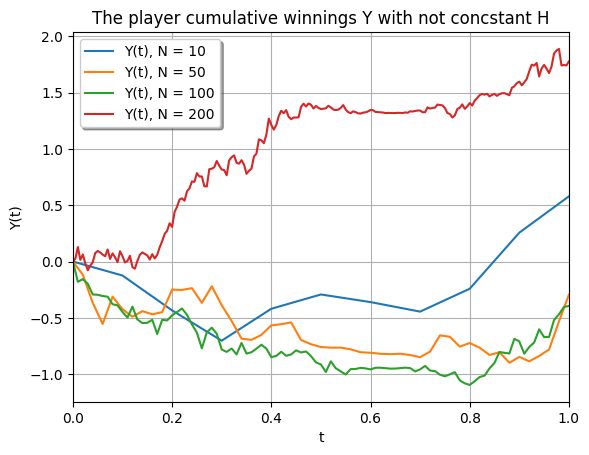

In [45]:
# let's implement bet price dependent of n
def h_func(n: np.ndarray, h0=1):
    return h0 * np.sin(n * 3 + 1.2)


def run_bet_generation(h_func: Any, t_data: np.ndarray, dx_data: np.ndarray):
    # calculate states differences
    winnings = h_func(t_data) * dx_data

    Y = winnings.cumsum()

    return Y



H = 1

n = [10, 50, 100, 200]

for N in n:
    # generate a random walk from the previous task
    t_data, w_data = WienerProcessGen(N)

    # calculate states differences
    delta_w = np.diff(w_data, prepend=0)

    Y = run_bet_generation(h_func, t_data, delta_w)

    plt.plot(t_data, Y, label = f"Y(t), N = {N}")

plt.legend(loc = 'best', fancybox = True, shadow = True)
plt.xlim(0.0, 1.0)
plt.xlabel("t")
plt.ylabel("Y(t)")
plt.title("The player cumulative winnings Y with not concstant H")
plt.grid(True)
plt.show()